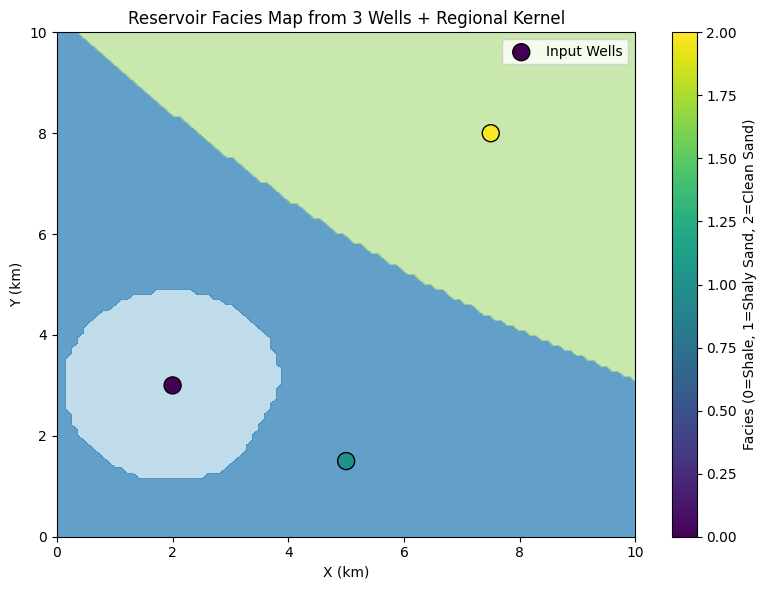

In [1]:
"While full field data is often confidential, we can simulate the core idea. Imagine a 10 km x 10 km area with only 3 wells."
"We use a simple Gaussian Process with a kernel that assumes spatial correlation based on regional depositional knowledge."

import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Simulate 3 wells in a 10x10 km area
np.random.seed(2025)
well_x = np.array([2.0, 7.5, 5.0])   # km
well_y = np.array([3.0, 8.0, 1.5])   # km
# True facies: 0=shale, 1=shaly sand, 2=clean sand
well_facies = np.array([0, 2, 1])

# Create prediction grid
x_grid, y_grid = np.meshgrid(np.linspace(0, 10, 100), np.linspace(0, 10, 100))
X_pred = np.column_stack((x_grid.ravel(), y_grid.ravel()))

# Use anisotropic kernel based on assumed paleo-flow direction (e.g., 45°)
# For simplicity, we use isotropic RBF here—but in practice, we rotate it
kernel = C(1.0) * RBF(length_scale=3.0)
gpc = GaussianProcessClassifier(kernel=kernel, random_state=42)
gpc.fit(np.column_stack((well_x, well_y)), well_facies)

# Predict most probable facies
facies_pred = gpc.predict(X_pred).reshape(x_grid.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(x_grid, y_grid, facies_pred, levels=[-0.5, 0.5, 1.5, 2.5],
             colors=['#a6cee3', '#1f78b4', '#b2df8a'], alpha=0.7)
plt.scatter(well_x, well_y, c=well_facies, cmap='viridis', edgecolor='k', s=150, label='Input Wells')
plt.xlabel('X (km)')
plt.ylabel('Y (km)')
plt.title('Reservoir Facies Map from 3 Wells + Regional Kernel')
plt.legend()
plt.colorbar(label='Facies (0=Shale, 1=Shaly Sand, 2=Clean Sand)')
plt.tight_layout()
plt.savefig('sparse_well_facies_map.png', dpi=300, bbox_inches='tight')
plt.show()